In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df=pd.read_csv('/kaggle/input/fakeauthentic-user-instagram/user_fake_authentic_2class.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fakeauthentic-user-instagram/user_fake_authentic_2class.csv'

In [15]:
df

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,44,48,325,33,1,0,12,0.000000,0.000,0.000000,0.00,0.000,0.000,0.0,0.000,0.111111,0.094985,f
1,10,66,321,150,1,0,213,0.000000,1.000,14.390000,1.97,0.000,1.500,0.0,0.000,0.206826,230.412857,f
2,33,970,308,101,1,1,436,0.000000,1.000,10.100000,0.30,0.000,2.500,0.0,0.056,0.572174,43.569939,f
3,70,86,360,14,1,0,0,1.000000,0.000,0.780000,0.06,0.000,0.000,0.0,0.000,1.000000,5.859799,f
4,3,21,285,73,1,0,93,0.000000,0.000,14.290000,0.00,0.667,0.000,0.0,0.000,0.300494,0.126019,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,13,145,642,0,1,0,7,0.461538,0.000,14.270000,0.58,0.000,0.077,0.0,0.000,0.192308,1745.291260,r
65322,652,3000,1300,146,1,1,384,0.000000,0.389,8.520000,0.13,0.000,1.611,0.0,0.000,0.169917,54.629120,r
65323,1500,3700,3200,147,1,1,129,0.000000,0.111,9.390000,0.31,0.722,0.000,0.0,0.056,0.058908,129.802048,r
65324,329,1500,1800,218,1,1,290,0.055556,0.000,6.350000,0.26,0.222,0.500,0.0,0.000,0.103174,53.402840,r


In [16]:
df['class'] = df['class'].map({'f': 1, 'r': 0})

In [17]:
# df_cleaned['class'].value_counts()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65326 entries, 0 to 65325
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     65326 non-null  int64  
 1   flw     65326 non-null  int64  
 2   flg     65326 non-null  int64  
 3   bl      65326 non-null  int64  
 4   pic     65326 non-null  int64  
 5   lin     65326 non-null  int64  
 6   cl      65326 non-null  int64  
 7   cz      65326 non-null  float64
 8   ni      65326 non-null  float64
 9   erl     65326 non-null  float64
 10  erc     65326 non-null  float64
 11  lt      65326 non-null  float64
 12  hc      65326 non-null  float64
 13  pr      65326 non-null  float64
 14  fo      65326 non-null  float64
 15  cs      65326 non-null  float64
 16  pi      65326 non-null  float64
 17  class   65326 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 9.0 MB


In [19]:
df.describe()

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
count,65326.000000,6.532600e+04,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000,65326.000000
mean,176.571227,1.183077e+03,2310.519211,57.497061,0.951765,0.281925,136.520344,0.250012,0.193229,19.146641,1.139421,0.208877,0.507796,0.032745,0.052837,0.299098,496.475193,0.503107
std,723.470655,2.170802e+04,2592.096104,64.129260,0.214264,0.449940,215.714486,0.337891,0.252939,121.047570,5.810627,0.300362,1.156921,0.220987,0.519058,0.349604,944.905389,0.499994
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.230000e+02,394.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,2.730000,0.080000,0.000000,0.000000,0.000000,0.000000,0.033327,24.571458,0.000000
50%,30.000000,3.380000e+02,995.000000,32.000000,1.000000,0.000000,46.000000,0.055556,0.059000,9.450000,0.440000,0.000000,0.077000,0.000000,0.000000,0.136915,183.227943,1.000000
75%,124.000000,8.170000e+02,3600.000000,110.000000,1.000000,1.000000,170.000000,0.444444,0.333000,18.680000,1.040000,0.333000,0.611000,0.000000,0.000000,0.456342,580.771927,1.000000
max,76200.000000,3.900000e+06,8800.000000,555.000000,1.000000,1.000000,3644.000000,1.000000,1.000000,26650.000000,1009.090027,1.000000,30.000000,20.000000,58.000000,1.000000,26786.134766,1.000000


In [20]:
df.isnull().sum()
df = df.drop_duplicates()


In [21]:
df.shape

(64244, 18)

flg,

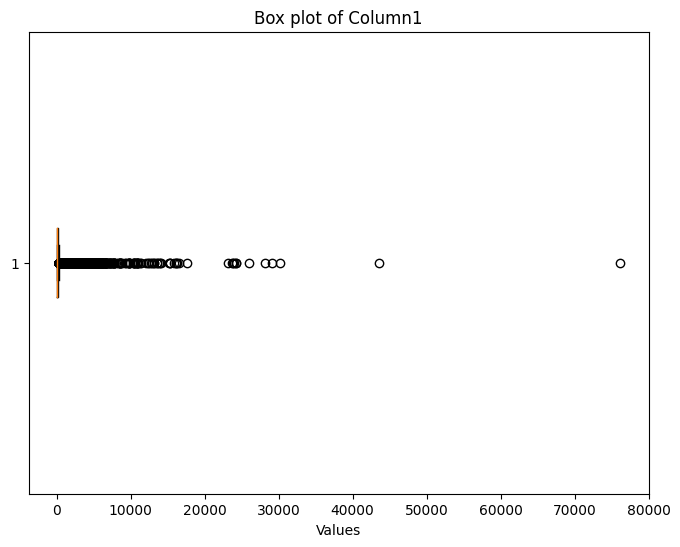

In [22]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['pos'], vert=False)
plt.xlabel('Values')
plt.title('Box plot of Column1')
plt.show()

In [23]:
df.columns

Index(['pos', 'flw', 'flg', 'bl', 'pic', 'lin', 'cl', 'cz', 'ni', 'erl', 'erc',
       'lt', 'hc', 'pr', 'fo', 'cs', 'pi', 'class'],
      dtype='object')

In [24]:
y=df['class']

In [25]:
X = df.drop(['class','bl','cl','cz','ni','lt', 'hc'], axis=1)

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,pos,flw,flg,pic,lin,erl,erc,pr,fo,cs,pi
64600,15,806,428,1,0,15.420000,0.52,0.000,0.000,0.038462,216.095047
53147,1,95,169,1,0,22.110001,3.16,0.000,0.000,0.000000,0.000000
27335,12,304,5900,1,0,36.380001,0.47,0.000,0.000,0.681818,70.580719
57218,3,881,1300,1,0,8.930000,0.68,0.000,0.000,0.000000,478.825836
3210,3,731,4000,1,0,9.210000,0.27,0.000,0.000,0.000000,1498.904785
...,...,...,...,...,...,...,...,...,...,...,...
63652,234,1100,2500,1,0,8.160000,0.94,0.000,0.000,0.013299,347.260590
39240,4,72,346,1,0,46.880001,9.38,0.000,0.000,0.500000,1493.890381
860,187,286,518,1,0,5.340000,0.60,0.000,0.000,0.276482,11.759846
15805,3,119,343,1,0,90.199997,9.80,0.333,3.333,0.251976,60.894073


In [3]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform the features
X_scaled = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


NameError: name 'X_train' is not defined

In [36]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# dt_classifier = DecisionTreeClassifier()
# dt_classifier.fit(X_scaled, y_train)

# # # Instantiate and train the K-Nearest Neighbors classifier
# # knn_classifier = KNeighborsClassifier()
# # knn_classifier.fit(X_scaled, y_train)

# # # Instantiate and train the Gradient Boosting classifier
# gb_classifier = GradientBoostingClassifier()
# gb_classifier.fit(X_scaled, y_train)

# # from sklearn.naive_bayes import GaussianNB

# # # Instantiate and train the Gaussian Naive Bayes classifier
# # nb_classifier = GaussianNB()
# # nb_classifier.fit(X_scaled, y_train)


# # Make predictions and evaluate each model
# for name, model1 in [
#                     ("Decision Tree", dt_classifier), 
# #                     ("K-Nearest Neighbors", knn_classifier), 
#                     ("Gradient Boosting", gb_classifier),
# #                     ("nb_classifier12",nb_classifier)
#                    ]:
#     # Make predictions
#     y_pred_sum = model1.predict(X_scaled_test)
    
#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred_sum)
#     print(f"{name} Model:")
#     print(f"Accuracy: {accuracy}")
#     print(classification_report(y_test, y_pred_sum))
#     print("-" * 40)


In [31]:

# from sklearn.naive_bayes import GaussianNB
# # from sklearn.metrics import accuracy_score

# nb_classifier = GaussianNB()

# # Train the classifier
# nb_classifier.fit(X_scaled, y_train)

# # Predictions on the test set
# y_pred = nb_classifier.predict(X_scaled_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [32]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import SGDClassifier
# # Initialize SGD Classifier
# sgd_classifier = SGDClassifier(loss='log', random_state=42)  # 'log' for logistic regression

# # Train the classifier
# sgd_classifier.fit(X_scaled, y_train)

# # Predictions on the test set
# y_pred = sgd_classifier.predict(X_scaled_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


In [33]:
# import xgboost as xgb
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load , test_size=0.2, random_state=42)

# # Initialize XGBoost Classifier
# xgb_classifier = xgb.XGBClassifier()

# # Train the classifier
# xgb_classifier.fit(X_scaled, y_train)

# # Predictions on the test set
# y_pred_xg = xgb_classifier.predict(X_scaled_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_xg)
# print("Accuracy:", accuracy)


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize individual classifiers
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[('gb', gb_classifier), ('xgb', xgb_classifier)], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_scaled, y_train)

# Predictions
y_pred_vo = voting_classifier.predict(X_scaled_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_vo)
print("Accuracy:", accuracy)


NameError: name 'X_scaled' is not defined

In [37]:
print(classification_report(y_test, y_pred_vo))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      6548
           1       0.95      0.83      0.89      6301

    accuracy                           0.90     12849
   macro avg       0.90      0.90      0.90     12849
weighted avg       0.90      0.90      0.90     12849



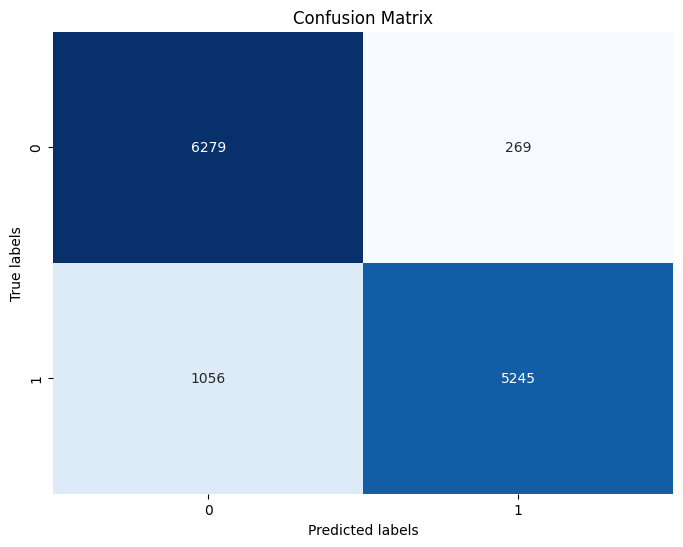

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_vo)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
import pickle

In [47]:
pickle.dump(voting_classifier, open('fake.pkl', 'wb'))
pickle.dump(scaler, open('standar_scaler.pkl', 'wb'))

In [41]:
pickled_model = pickle.load(open('/kaggle/working/fake.pkl', 'rb'))
result = pickled_model.score(X_scaled_test, y_test)
print(result)

0.8968791345630011


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51395 entries, 64600 to 57504
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pos     51395 non-null  int64  
 1   flw     51395 non-null  int64  
 2   flg     51395 non-null  int64  
 3   pic     51395 non-null  int64  
 4   lin     51395 non-null  int64  
 5   erl     51395 non-null  float64
 6   erc     51395 non-null  float64
 7   pr      51395 non-null  float64
 8   fo      51395 non-null  float64
 9   cs      51395 non-null  float64
 10  pi      51395 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.7 MB


In [75]:
import pandas as pd

# Define the columns and their corresponding data types
columns = ['pos', 'flw', 'flg', 'pic', 'lin', 'erl', 'erc', 'pr', 'fo', 'cs', 'pi']
column_data_types = {'pos': int, 'flw': int, 'flg': int, 'pic': int, 'lin': int,
                     'erl': float, 'erc': float, 'pr': float, 'fo': float, 'cs': float, 'pi': float}

# Initialize an empty DataFrame
data = pd.DataFrame(columns=columns)

# Take input for each column
for column in columns:
    data_type = column_data_types[column]
    user_input = input(f"Enter value for {column}: ")
    
    # Convert input to the corresponding data type
    if data_type == int:
        user_input = int(user_input)
    elif data_type == float:
        user_input = float(user_input)
    
    data[column] = [user_input]

# Display the DataFrame
print("Input DataFrame:")

Enter value for pos:  15
Enter value for flw:  806
Enter value for flg:  428
Enter value for pic:  1
Enter value for lin:  0
Enter value for erl:  15.42
Enter value for erc:  0.52
Enter value for pr:  0
Enter value for fo:  0
Enter value for cs:  0.0384
Enter value for pi:  216.09


Input DataFrame:


In [16]:
import pickle

standard_scaler = pickle.load(open('./fake.pkl', 'rb'))


ModuleNotFoundError: No module named 'sklearn.ensemble._gb_losses'

In [152]:
std=standard_scaler.transform(er)

In [153]:
scaler.transform(er)

array([[-0.12297317, -0.06273259, -0.71692008, ..., -0.11222276,
        -0.52843793, -0.18615158],
       [-0.19050263, -0.03558957, -0.57637535, ..., -0.11222276,
        -0.82061487,  1.74615271],
       [ 0.23830941,  0.01118166, -0.52913994, ..., -0.11222276,
        -0.19156734, -0.44154294],
       ...,
       [-0.19613008, -0.08280945, -0.22907889, ..., -0.11222276,
        -0.35366243, 10.60036074],
       [-0.16236536, -0.05510563, -0.50010177, ..., -0.11222276,
        -0.41760683,  1.41856878],
       [ 0.09649755, -0.0777622 , -0.57947276, ...,  2.04117274,
        -0.68988508,  0.1623394 ]])

In [154]:
er

,pos,flw,flg,pic,lin,erl,erc,pr,fo,cs,pi
0,69,541,440,1,0,10.120000,0.50,0.0,0.000,0.107055,334.596802
1,9,783,803,1,0,19.820000,1.99,0.0,0.000,0.007400,2137.979248
2,390,1200,925,1,0,11.540000,0.76,0.0,0.000,0.221954,96.244957
3,138,1100,1000,1,0,20.440001,1.61,0.0,0.000,0.025055,226.622437
4,1,228,487,1,0,9.210000,1.75,0.0,0.000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
95,8,26,48,1,0,23.080000,2.40,0.0,0.125,0.292808,21.343681
96,163,403,307,1,0,8.200000,1.21,0.0,0.000,0.036566,772.707336
97,4,362,1700,1,0,14.990000,1.24,0.0,0.000,0.166667,10401.441410
98,34,609,1000,1,0,10.170000,1.23,0.0,0.000,0.144857,1832.251465


In [156]:
pickled_model.predict(std)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [131]:
df1=pd.read_csv("/kaggle/input/fakeauthentic-user-instagram/user_fake_authentic_4class.csv")

In [135]:
ty = df1.drop(['class','bl','cl','cz','ni','lt', 'hc'], axis=1)

In [151]:
er=ty.head(100)

In [147]:
df1.head(100)

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi,class
0,69,541,440,293,1,0,223,0.000000,0.111,10.120000,0.50,0.944,0.556,0.0,0.000,0.107055,334.596802,r
1,9,783,803,76,1,0,101,0.000000,0.000,19.820000,1.99,0.889,0.222,0.0,0.000,0.007400,2137.979248,r
2,390,1200,925,103,1,0,723,0.000000,0.000,11.540000,0.76,1.000,2.389,0.0,0.000,0.221954,96.244957,r
3,138,1100,1000,40,1,0,24,0.166667,0.167,20.440001,1.61,0.833,0.111,0.0,0.000,0.025055,226.622437,r
4,1,228,487,84,1,0,30,0.000000,0.000,9.210000,1.75,1.000,0.000,0.0,0.000,0.000000,0.000000,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8,26,48,136,1,0,183,0.000000,0.000,23.080000,2.40,1.000,0.250,0.0,0.125,0.292808,21.343681,r
96,163,403,307,0,1,0,101,0.166667,0.000,8.200000,1.21,0.722,1.278,0.0,0.000,0.036566,772.707336,r
97,4,362,1700,0,1,0,53,0.500000,0.250,14.990000,1.24,0.750,0.750,0.0,0.000,0.166667,10401.441410,r
98,34,609,1000,72,1,0,123,0.333333,0.222,10.170000,1.23,0.722,0.000,0.0,0.000,0.144857,1832.251465,r
